In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pickle
import librosa
import pandas as pd
import numpy as np
import IPython.display as ipd
from tensorflow.keras.utils import to_categorical
import os
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import seaborn as sns

le = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [ ]:
labels = ["alarm off", "alarm on", "camera off", "camera on", "door close", "door open", "fan decrease", "fan increase", "fan off", "fan on", "fridge off", "fridge on", "lights off", "lights on", "speaker decrease", "speaker increase", "speaker off", "speaker on", "tv off", "tv on"]

In [ ]:
def plot_confusion_matrix(confusion_matrix, labels = labels):
    """
    plots the confusion matrix
    """
    # matrix = confusion_matrix(y_true, y_pred)
    matrix = confusion_matrix
    fig, ax = plt.subplots(figsize=(8,6))
    plt.imshow(matrix)
    ax.set_xticks(range(len(labels)));
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_yticks(range(len(labels)));
    ax.set_yticklabels(labels)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    max_confusions = 0
    confused_classes = (-1, -1)
    for i, true_label in enumerate(matrix):
        for j, predicted_label in enumerate(true_label):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="w");
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.title("Object Confusion Matrix");
def plot_loss(history):

    # plt.figure(figsize=(10,7))
    plt.plot(history.history['loss'], c ="darkblue")
    plt.plot(history.history['val_loss'], c ="crimson")
    plt.legend(["Train", "Validation"])
    plt.title("Model loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True, alpha = 0.2)
    plt.show()

def plot_accuracy(history):
    # plt.figure(figsize=(10, 7))
    plt.plot(history.history['accuracy'], c="darkblue")
    plt.plot(history.history['val_accuracy'], c="crimson")
    plt.legend(["Train", "Validation"])
    plt.title("Model Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True, alpha=0.2)
    plt.show()

In [ ]:
os.chdir("/content/drive/MyDrive/final")

In [ ]:
ls

data13_no_aug.pkl  data_spec_128.pkl    lug13_aug_flat.tflite  lug_wio.h5
data13.pkl         data_spec.pkl        lug_13.tflite          model.png
data1.pkl          data_wio_no_aug.pkl  lug_aug_flat.tflite    test/
data.pkl           data_wio.pkl         lug.tflite             train/


In [ ]:
a = le.fit_transform(labels)

In [ ]:
pickle_path = 'data13.pkl'

with open(pickle_path, 'rb') as file:
    data = pickle.load(file)

Xtrain = data['Xtrain']
Xtest = data['Xtest']
Xval = data['Xval']
ytrain = data['ytrain']
ytest = data['ytest']
yval = data['yval']

Xtrain.shape,Xtest.shape

((24381, 126, 13, 1), (711, 126, 13, 1))

In [ ]:
for y in ytrain[:10]:
  print(y)
  print(le.classes_[y])

1
alarm on
1
alarm on
1
alarm on
18
tv off
18
tv off
18
tv off
3
camera on
3
camera on
3
camera on
0
alarm off


In [ ]:
pickle_path = '/content/drive/MyDrive/Xtest13.pkl'

with open(pickle_path, 'rb') as file:
    data = pickle.load(file)

Xtest = data['Xtest']

ytest = data['ytest']


Xtest.shape,ytest.shape

((1068, 126, 13, 1), (1068,))

In [ ]:
# Xtrain = np.append(Xtrain, Xval)
ytrain = np.append(ytrain,yval)

In [ ]:
for y in ytrain[:10]:
  print(y)
  print(le.classes_[y])

1
alarm on
1
alarm on
1
alarm on
18
tv off
18
tv off
18
tv off
3
camera on
3
camera on
3
camera on
0
alarm off


In [ ]:
# Xtrain = np.concatenate((Xtrain, Xval), axis=0)
Xtrain.shape

(24381, 126, 13, 1)

In [ ]:
Xtrain.shape, ytrain.shape

((24381, 126, 13, 1), (25386,))

In [ ]:
X_train = list(Xtrain)
for X in Xval:
  X_train.append(X)
Xtrain = np.array(X_train)
Xtrain.shape

(25386, 126, 13, 1)

In [ ]:
train_actions=[]
train_dev = []
for set_ in ytrain:
  y = le.classes_[set_]
  train_actions.append(y.split(" ")[-1])
  train_dev.append(y.split(" ")[0])
  # print(y.split(" ")[0],y.split(" ")[-1])

In [ ]:
test_actions=[]
test_dev = []
for set_ in ytest:
  y = le.classes_[set_]
  test_actions.append(y.split(" ")[-1])
  test_dev.append(y.split(" ")[0])
  # print(y.split(" ")[0],y.split(" ")[-1])

In [ ]:
y.split(" ")[0],y.split(" ")[-1]

('tv', 'on')

In [ ]:
action_encoder = LabelEncoder()
dev_encoder = LabelEncoder()
train_dev = dev_encoder.fit_transform(train_dev)
train_actions = action_encoder.fit_transform(train_actions)
train_actions = to_categorical(train_actions)
train_objects = to_categorical(train_dev)
ytrain = [train_actions,train_objects]
# ytrain = [train_dev,train_actions]

In [ ]:
test_dev = dev_encoder.transform(test_dev)
test_actions = action_encoder.transform(test_actions)
test_actions = to_categorical(test_actions)
test_objects = to_categorical(test_dev)
ytest = [test_actions,test_objects]
# ytest = [test_dev,test_actions]

In [ ]:
Xval.shape

(1005, 126, 13, 1)

In [ ]:
ytest, ytrain

([array([[0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 1., 0., 0.],
         ...,
         [0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1., 0.]], dtype=float32),
  array([[1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)],
 [array([[0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1., 0.],
         ...,
         [0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 1., 0.],
         [0., 0., 0., 0., 1., 0.]], dtype=float32),
  array([[1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 1.],
         [0., 0., 0., ..., 0., 1., 0.],
         [0., 0., 0., ..., 0., 1

In [ ]:
ytrain

[array([[0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0.]], dtype=float32),
 array([[1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)]

In [ ]:
len(dev_encoder.classes_), len(action_encoder.classes_)

(8, 6)

In [ ]:

import tensorflow as tf

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Flatten, Activation, Add
from tensorflow.keras.layers import Dense, Dropout, Softmax, TimeDistributed, LSTM
from tensorflow.keras.layers import Conv2D, DepthwiseConv2D
from tensorflow.keras.activations import relu
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, ZeroPadding2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.models import load_model
from tensorflow.keras import layers, callbacks


# Define the EarlyStopping callback
early_stopping = callbacks.EarlyStopping(
    monitor='object_output_accuracy',
    patience=5,
    restore_best_weights=True
)

# Uno

In [ ]:
main_input = Input(shape=(126, 13, 1), name='main_input')

x = Conv2D(16, 3, padding='same', activation='relu', use_bias = False)(main_input)
x = BatchNormalization()(x)

x = Conv2D(16, 2, padding='same', activation='relu', use_bias = False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(16, 2, padding='same', activation='relu', use_bias = False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(32, 3, padding='same', activation='relu', use_bias = False)(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size = (2,2))(x)

x = Conv2D(128, 2, padding='same', activation='relu', use_bias = False)(x)
x = BatchNormalization()(x)

x = GlobalMaxPooling2D()(x)

x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.4)(x)

object_output = Dense(6, activation='softmax', name='object_output')(x)
action_output = Dense(8, activation='softmax', name='action_output')(x)


# intent_output = Dense(20, activation='softmax', name='intent_output', use_bias = False)(x)

model = Model(inputs=main_input, outputs=[object_output,action_output])

optim = Adam(learning_rate=1e-3)

model.compile(optimizer = optim, loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_input (InputLayer)        [(None, 126, 13, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d (Conv2D)                (None, 126, 13, 16)  144         ['main_input[0][0]']             
                                                                                                  
 batch_normalization (BatchNorm  (None, 126, 13, 16)  64         ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                              

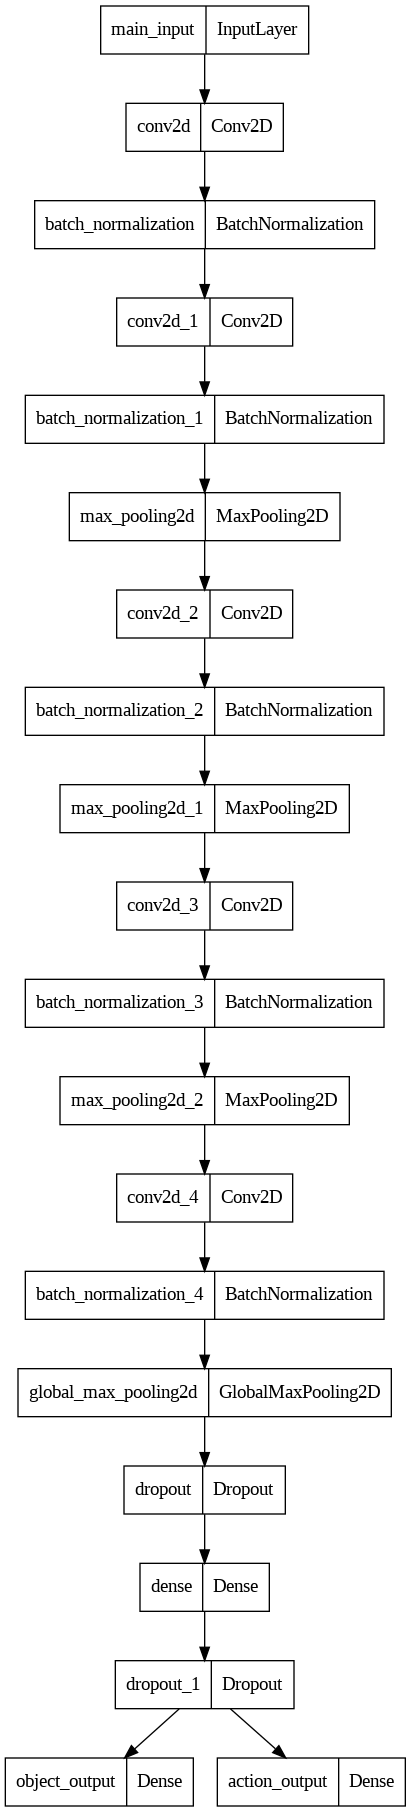

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# history = model.fit(Xtrain,ytrain, validation_data = (Xtest,ytest), epochs = 80,workers = 6, max_queue_size = 10,use_multiprocessing = True,batch_size=32,callbacks=[early_stopping])
# history = model.fit(Xtrain,ytrain, validation_data = (Xtest,ytest), epochs = 80,workers = 6, max_queue_size = 10,use_multiprocessing = True,batch_size=32)
history = model.fit(Xtrain,ytrain ,epochs=300, batch_size=32, validation_data=(Xtest, ytest),callbacks=[early_stopping])

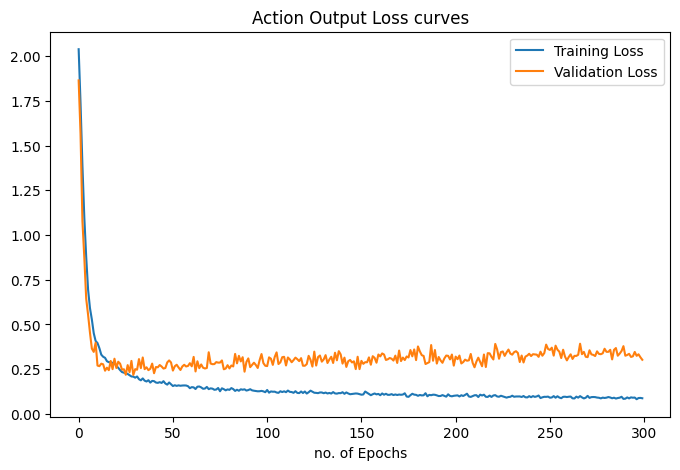

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['action_output_loss']
val_loss = history.history['val_action_output_loss']

plt.figure(figsize=(8,5))
# Plot the training and validation loss
plt.title('Action Output Loss curves')
plt.xlabel('no. of Epochs')
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

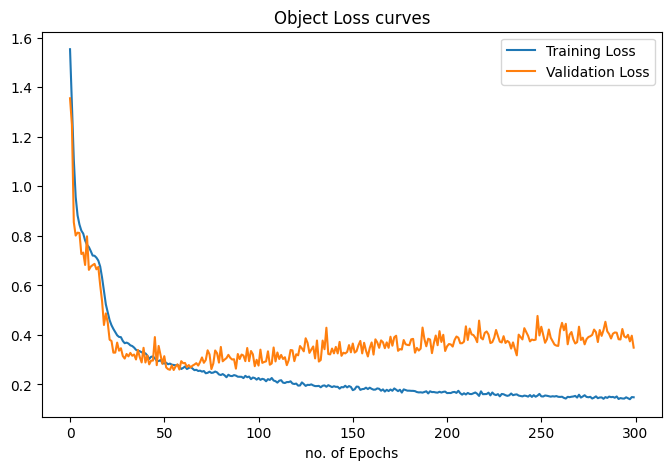

In [ ]:
train_loss = history.history['object_output_loss']
val_loss = history.history['val_object_output_loss']

plt.figure(figsize=(8,5))
# Plot the training and validation loss
plt.title('Object Loss curves')
plt.xlabel('no. of Epochs')
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

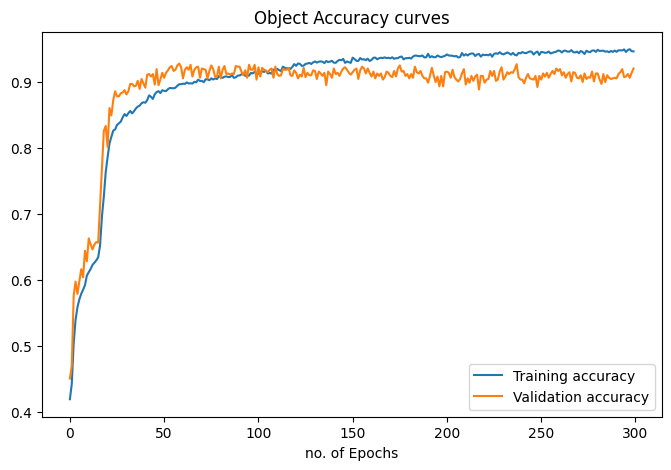

In [ ]:
train_accuracy = history.history['object_output_accuracy']
val_accuracy = history.history['val_object_output_accuracy']

plt.figure(figsize=(8,5))
plt.title('Object Accuracy curves')
plt.xlabel('no. of Epochs')
# Plot the training and validation loss
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend()
plt.show()

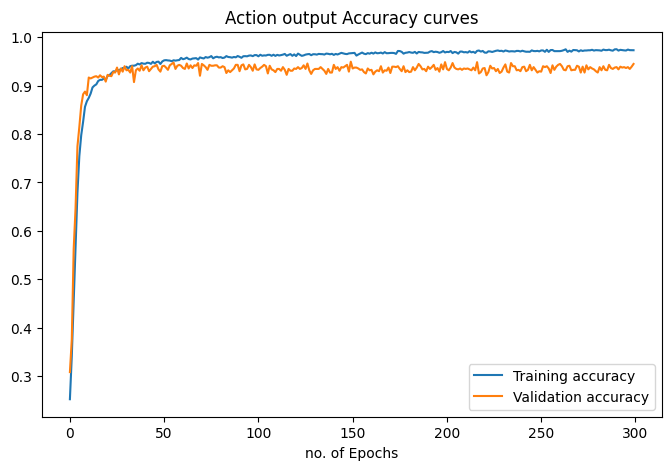

In [ ]:
train_accuracy = history.history['action_output_accuracy']
val_accuracy = history.history['val_action_output_accuracy']

plt.figure(figsize=(8,5))
plt.title('Action output Accuracy curves')
plt.xlabel('no. of Epochs')
# Plot the training and validation loss
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(Xtest, ytest, batch_size=32)

34/34 [==============================] - 0s 4ms/step - loss: 0.6511 - object_output_loss: 0.3487 - action_output_loss: 0.3024 - object_output_accuracy: 0.9204 - action_output_accuracy: 0.9448


In [ ]:
y_pred = model.predict(Xtest, batch_size =32)

34/34 [==============================] - 0s 2ms/step


In [ ]:
action_pred,object_pred = y_pred

action_predictions = np.argmax(action_pred, axis =1)
object_predictions = np.argmax(object_pred, axis =1)
test_actions = np.argmax(test_actions, axis =1)
# test_actions = np.argmax(test_actions, axis =1)

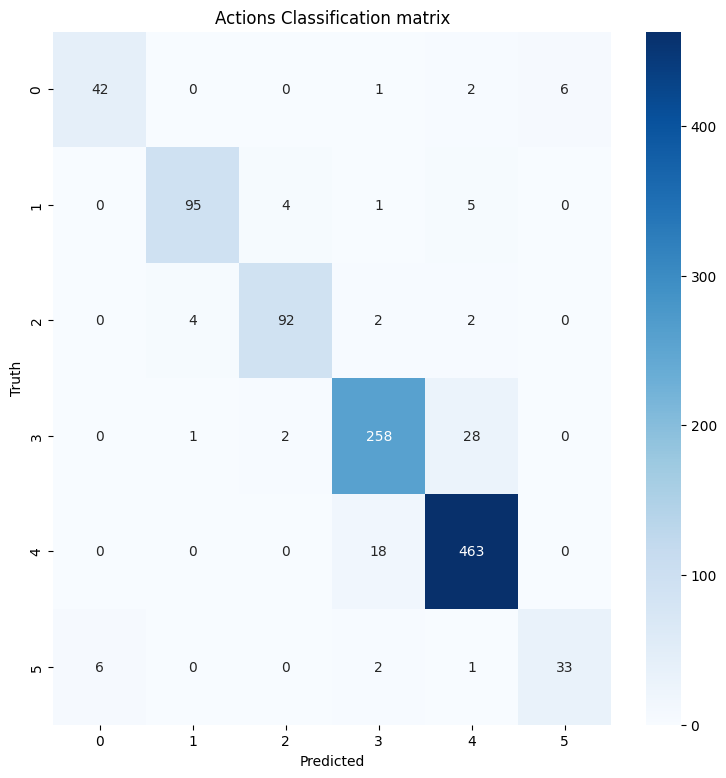

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#y_valid = le.inverse_transform(y_val)
# Generate the confusion matrix
# test_actions = np.argmax(test_actions, axis =1)
plt.figure(figsize=(9, 9))
confusion_matrix = confusion_matrix(test_actions, action_predictions)

# # Plot the confusion matrix
# sns.heatmap(confusion_matrix, annot=True, fmt ='d')
sns.heatmap(confusion_matrix, annot=True,fmt="d",cmap='Blues')
plt.title('Actions Classification matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

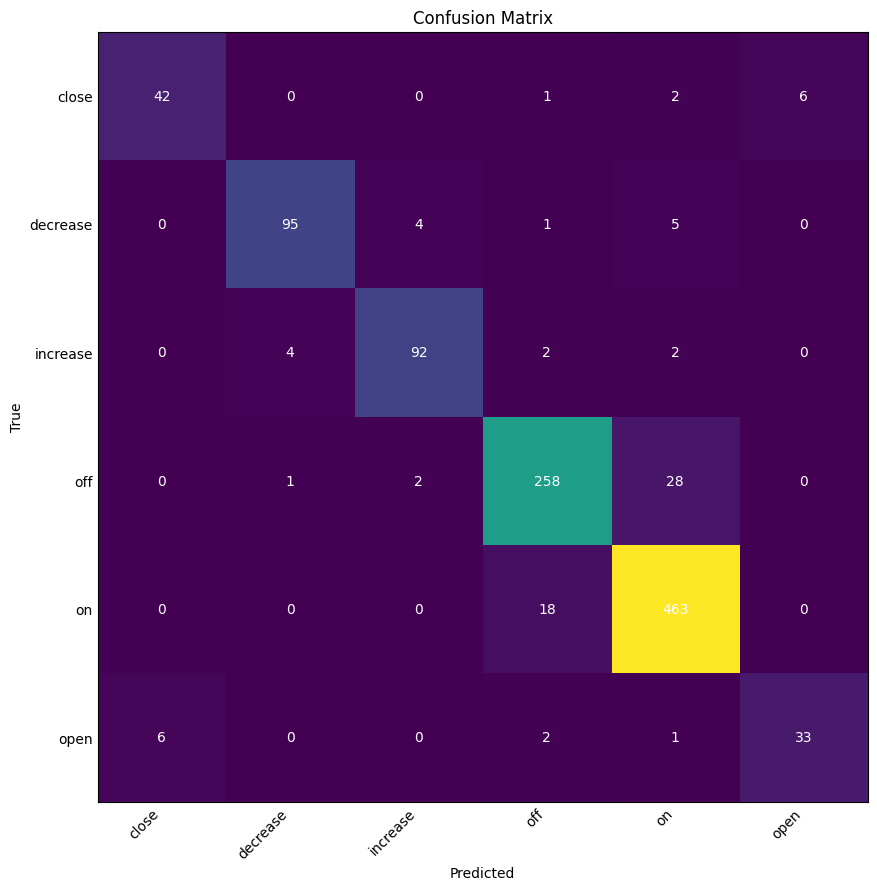

In [ ]:
plot_confusion_matrix(confusion_matrix, labels = action_encoder.classes_
                      )

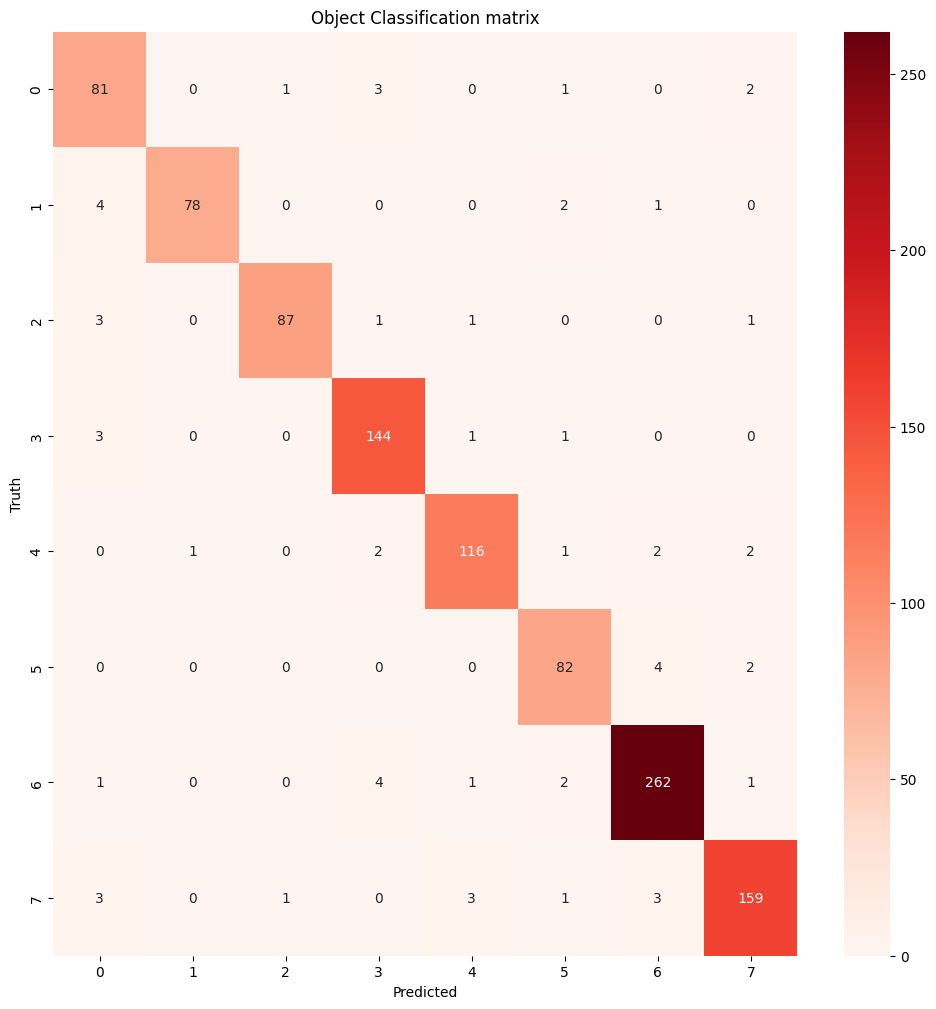

In [ ]:
from sklearn.metrics import confusion_matrix

#y_valid = le.inverse_transform(y_val)
# Generate the confusion matrix
plt.figure(figsize=(12,12))
confusion_matrix = confusion_matrix(test_dev, object_predictions)

# # Plot the confusion matrix
# sns.heatmap(confusion_matrix, annot=True, fmt ='d')
sns.heatmap(confusion_matrix, annot=True,fmt="d",cmap='Reds')
plt.title('Object Classification matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

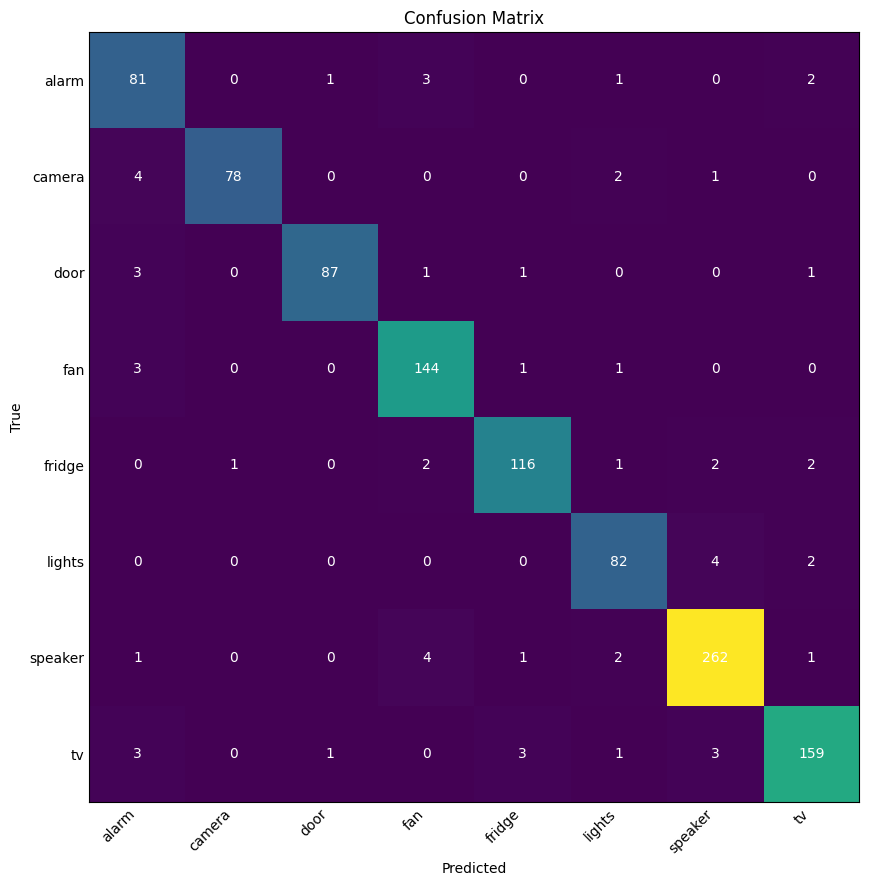

In [ ]:
plot_confusion_matrix(confusion_matrix, labels = dev_encoder.classes_
                      )

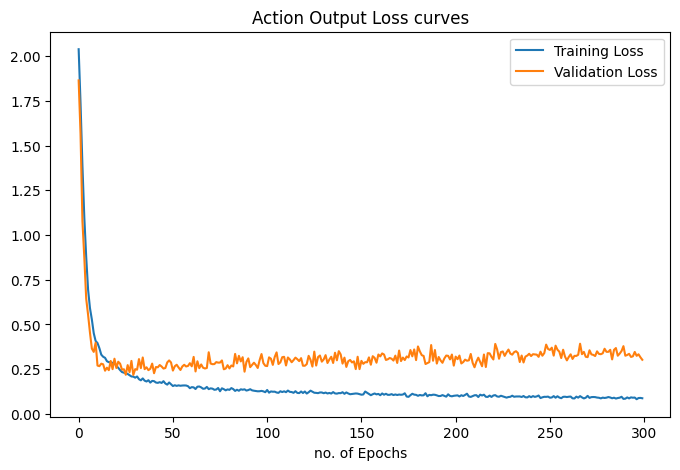

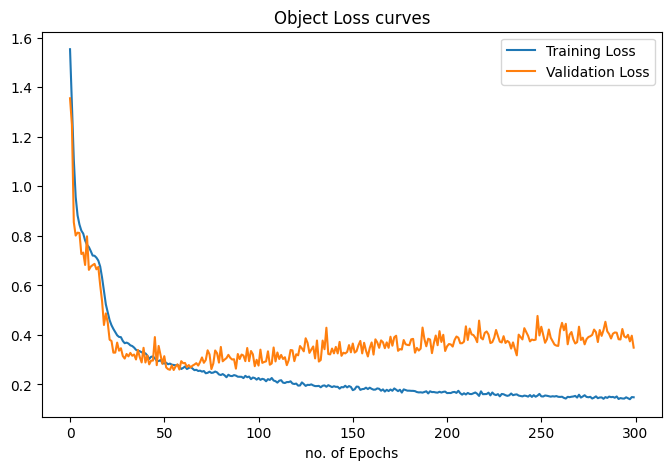

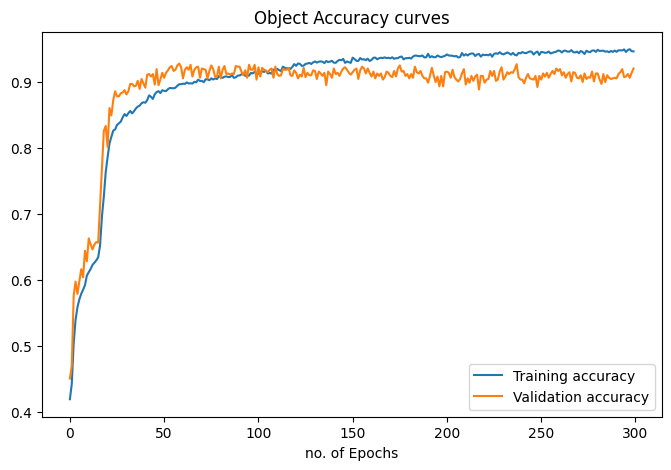

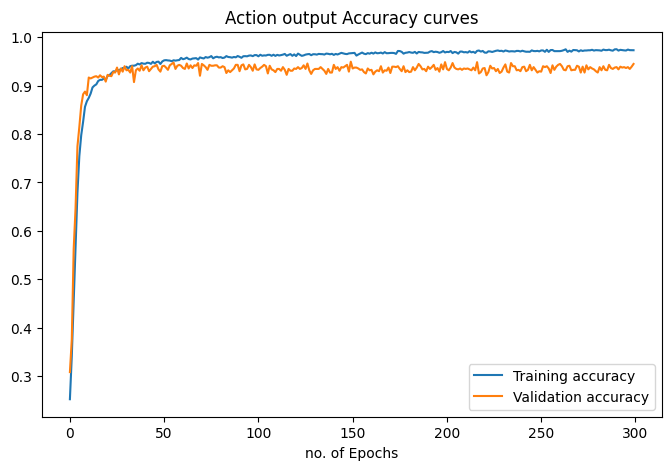

34/34 [==============================] - 0s 4ms/step - loss: 0.6511 - object_output_loss: 0.3487 - action_output_loss: 0.3024 - object_output_accuracy: 0.9204 - action_output_accuracy: 0.9448


NameError: ignored

<Figure size 900x900 with 0 Axes>

In [ ]:
train_loss = history.history['action_output_loss']
val_loss = history.history['val_action_output_loss']

plt.figure(figsize=(8,5))
# Plot the training and validation loss
plt.title('Action Output Loss curves')
plt.xlabel('no. of Epochs')
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

train_loss = history.history['object_output_loss']
val_loss = history.history['val_object_output_loss']

plt.figure(figsize=(8,5))
# Plot the training and validation loss
plt.title('Object Loss curves')
plt.xlabel('no. of Epochs')
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

train_accuracy = history.history['object_output_accuracy']
val_accuracy = history.history['val_object_output_accuracy']

plt.figure(figsize=(8,5))
plt.title('Object Accuracy curves')
plt.xlabel('no. of Epochs')
# Plot the training and validation loss
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend()
plt.show()

train_accuracy = history.history['action_output_accuracy']
val_accuracy = history.history['val_action_output_accuracy']

plt.figure(figsize=(8,5))
plt.title('Action output Accuracy curves')
plt.xlabel('no. of Epochs')
# Plot the training and validation loss
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend()
plt.show()

y_pred = model.predict(Xtest, batch_size =32)
score = model.evaluate(Xtest, ytest, batch_size=32)
action_pred,object_pred = y_pred

action_predictions = np.argmax(action_pred, axis =1)
object_predictions = np.argmax(object_pred, axis =1)

from sklearn.metrics import confusion_matrix

#y_valid = le.inverse_transform(y_val)
# Generate the confusion matrix
plt.figure(figsize=(9, 9))
confusion_matrix = confusion_matrix(y_actions_, action_predictions)

# # Plot the confusion matrix
# sns.heatmap(confusion_matrix, annot=True, fmt ='d')
sns.heatmap(confusion_matrix, annot=True,fmt="d",cmap='Blues')
plt.title('Actions Classification matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


from sklearn.metrics import confusion_matrix

#y_valid = le.inverse_transform(y_val)
# Generate the confusion matrix
plt.figure(figsize=(12,12))
confusion_matrix = confusion_matrix(y_objects_, object_predictions)

# # Plot the confusion matrix
# sns.heatmap(confusion_matrix, annot=True, fmt ='d')
sns.heatmap(confusion_matrix, annot=True,fmt="d",cmap='Reds')
plt.title('Object Classification matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
# plt.imshow(confusion_matrix, cmap = 'binary')
# plt.show



In [ ]:
test_actions

In [ ]:
model.evaluate(Xtest,ytest)

In [ ]:
# loss, accuracy = model.evaluate(Xtest, ytest)

# print("Validation Loss:", loss)
# print("Validation Accuracy:", accuracy)

# allow bias

In [ ]:
# from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D, Dropout, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

main_input = Input(shape=(126, 13, 1), name='main_input')

x = Conv2D(128, 2, padding='same', activation='relu')(main_input)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, 3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(16, 2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(16, 2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)

x = GlobalMaxPooling2D()(x)

x = Dropout(0.3)(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
# output_slot = Dropout(0.25)(x)

# output_slot = Dense(16, activation='softmax', name='branch_object')(x)
object_output = Dense(6, activation='softmax', name='object_output')(x)
action_output = Dense(8, activation='softmax', name='action_output')(x)

# intent_output = Dense(20, activation='softmax', name='intent_output', use_bias = False)(x)

model = Model(inputs=main_input, outputs=[object_output,action_output])

optim = Adam(learning_rate=1e-3)

model.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 main_input (InputLayer)        [(None, 126, 13, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 conv2d_30 (Conv2D)             (None, 126, 13, 128  640         ['main_input[0][0]']             
                                )                                                                 
                                                                                                  
 batch_normalization_30 (BatchN  (None, 126, 13, 128  512        ['conv2d_30[0][0]']              
 ormalization)                  )                                                           

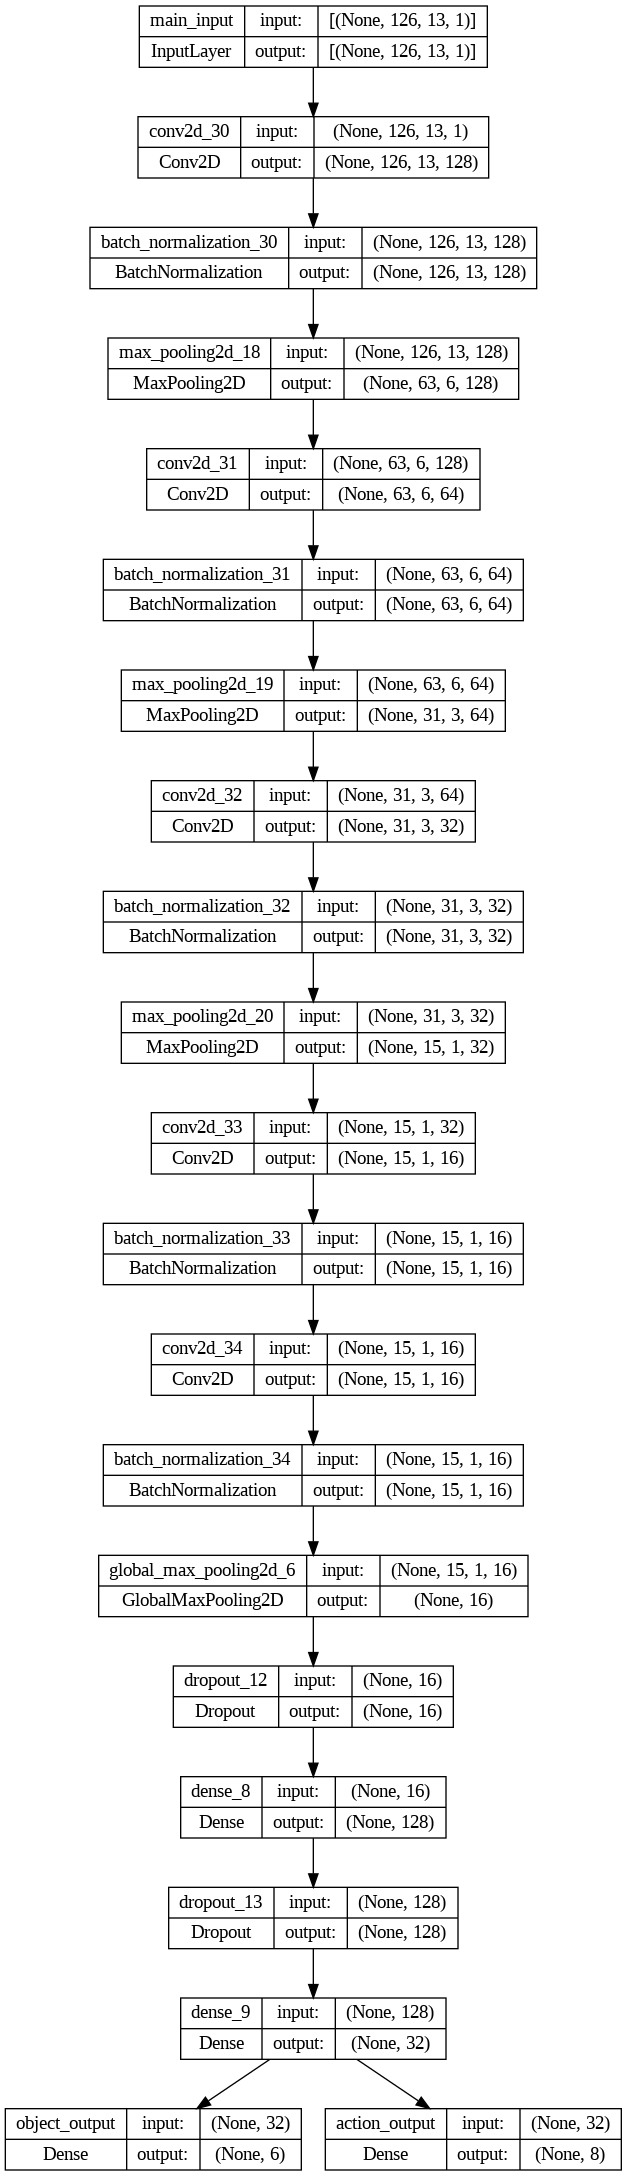

In [ ]:
tf.keras.utils.plot_model(model,show_shapes= True)

In [ ]:
history = model.fit(Xtrain,ytrain ,epochs=300, batch_size=32, validation_data=(Xtest, ytest),callbacks=[early_stopping])

Epoch 1/300
794/794 [==============================] - 14s 11ms/step - loss: 3.2992 - object_output_loss: 1.4261 - action_output_loss: 1.8731 - object_output_accuracy: 0.4256 - action_output_accuracy: 0.2900 - val_loss: 2.9612 - val_object_output_loss: 1.2622 - val_action_output_loss: 1.6990 - val_object_output_accuracy: 0.4691 - val_action_output_accuracy: 0.3474
Epoch 2/300
794/794 [==============================] - 8s 10ms/step - loss: 2.6444 - object_output_loss: 1.1497 - action_output_loss: 1.4947 - object_output_accuracy: 0.4842 - action_output_accuracy: 0.4179 - val_loss: 2.7536 - val_object_output_loss: 1.1708 - val_action_output_loss: 1.5828 - val_object_output_accuracy: 0.4682 - val_action_output_accuracy: 0.4345
Epoch 3/300
794/794 [==============================] - 9s 11ms/step - loss: 2.1747 - object_output_loss: 0.9596 - action_output_loss: 1.2152 - object_output_accuracy: 0.5264 - action_output_accuracy: 0.5291 - val_loss: 1.8820 - val_object_output_loss: 0.8300 - val_ac

In [ ]:
model.evaluate(Xtest, ytest)

34/34 [==============================] - 0s 4ms/step - loss: 0.6487 - object_output_loss: 0.3658 - action_output_loss: 0.2828 - object_output_accuracy: 0.9185 - action_output_accuracy: 0.9429


[0.6486579179763794,
 0.36580905318260193,
 0.2828488051891327,
 0.9185393452644348,
 0.9428839087486267]

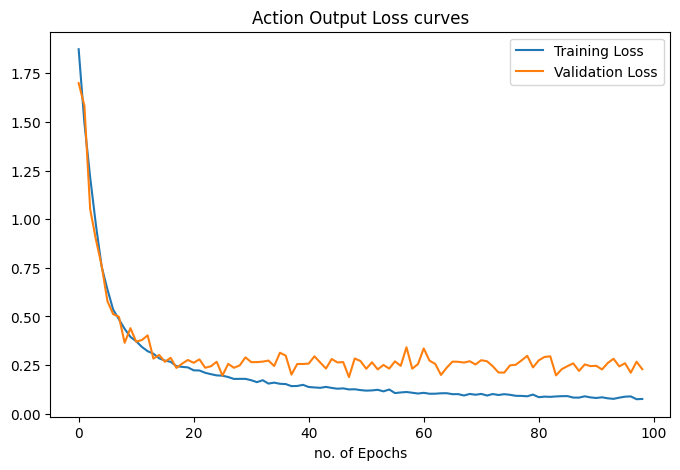

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['action_output_loss']
val_loss = history.history['val_action_output_loss']

plt.figure(figsize=(8,5))
# Plot the training and validation loss
plt.title('Action Output Loss curves')
plt.xlabel('no. of Epochs')
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

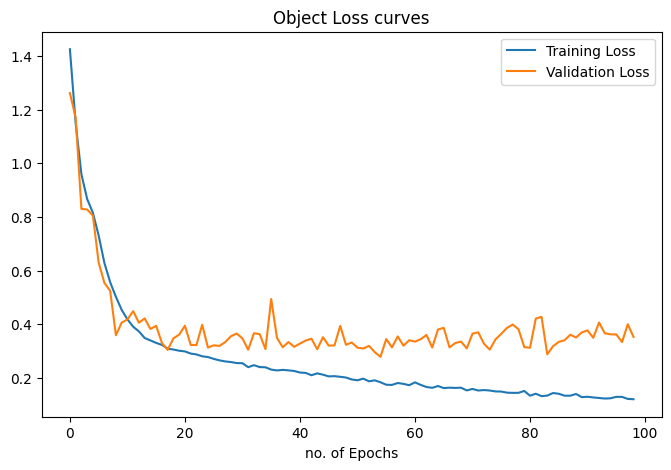

In [ ]:
train_loss = history.history['object_output_loss']
val_loss = history.history['val_object_output_loss']

plt.figure(figsize=(8,5))
# Plot the training and validation loss
plt.title('Object Loss curves')
plt.xlabel('no. of Epochs')
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.show()

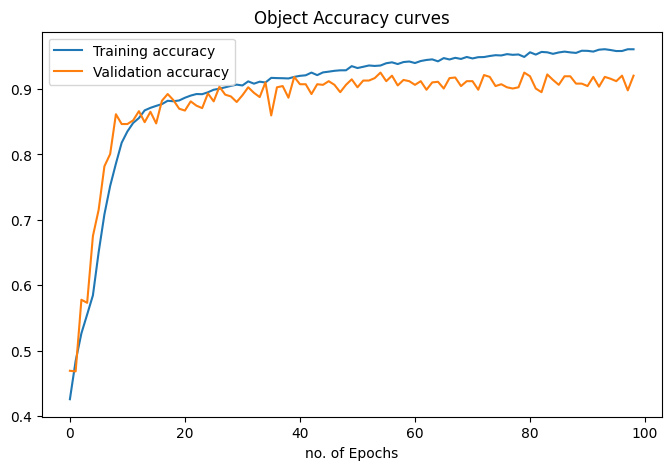

In [ ]:
train_accuracy = history.history['object_output_accuracy']
val_accuracy = history.history['val_object_output_accuracy']

plt.figure(figsize=(8,5))
plt.title('Object Accuracy curves')
plt.xlabel('no. of Epochs')
# Plot the training and validation loss
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend()
plt.show()

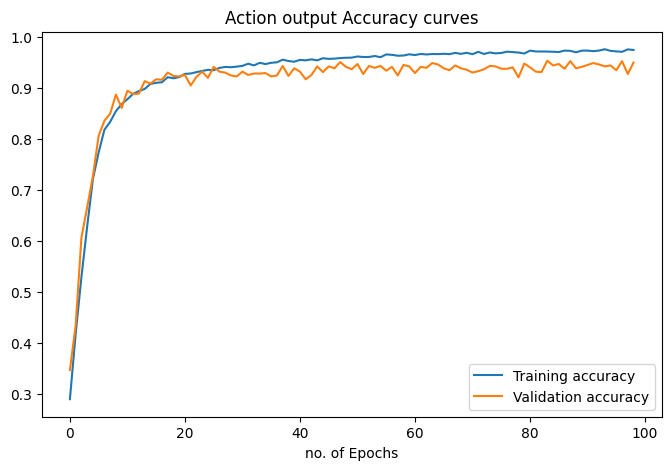

In [ ]:
train_accuracy = history.history['action_output_accuracy']
val_accuracy = history.history['val_action_output_accuracy']

plt.figure(figsize=(8,5))
plt.title('Action output Accuracy curves')
plt.xlabel('no. of Epochs')
# Plot the training and validation loss
plt.plot(train_accuracy, label='Training accuracy')
plt.plot(val_accuracy, label='Validation accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(Xtest, batch_size =32)
# score = model.evaluate(Xtest, ytest, batch_size=32)
action_pred,object_pred = y_pred

34/34 [==============================] - 0s 2ms/step


In [ ]:
action_predictions = np.argmax(action_pred, axis =1)
object_predictions = np.argmax(object_pred, axis =1)


In [ ]:
# test_actions = np.argmax(test_actions,axis=1)

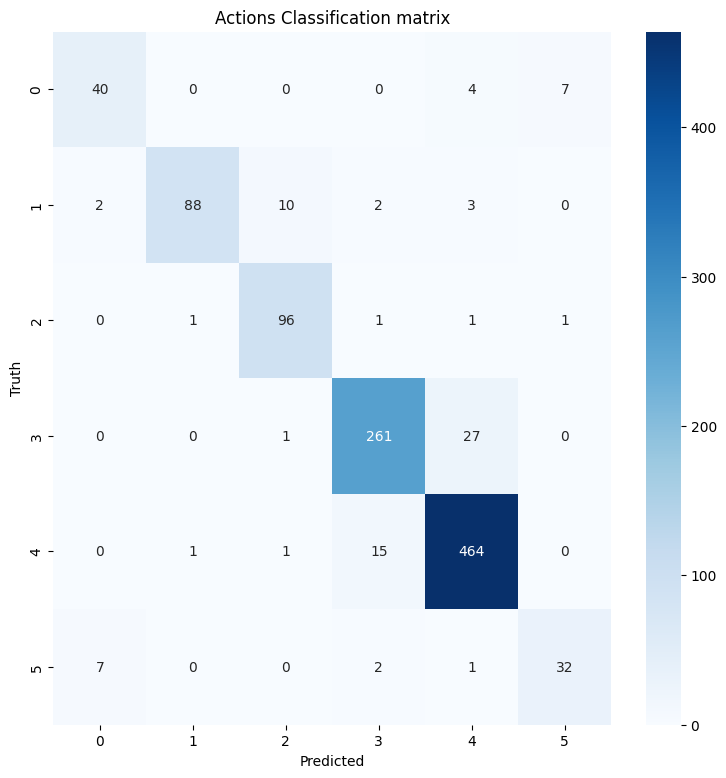

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

#y_valid = le.inverse_transform(y_val)
# Generate the confusion matrix
plt.figure(figsize=(9, 9))
confusion_matrix = confusion_matrix(test_actions, action_predictions)

# # Plot the confusion matrix
# sns.heatmap(confusion_matrix, annot=True, fmt ='d')
sns.heatmap(confusion_matrix, annot=True,fmt="d",cmap='Blues')
plt.title('Actions Classification matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


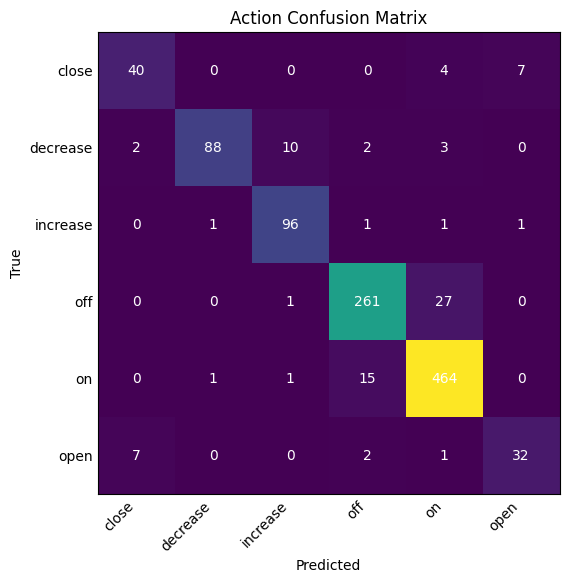

In [ ]:
plot_confusion_matrix(confusion_matrix, labels = action_encoder.classes_)

In [ ]:
print('Action classification report')
print(classification_report(test_actions, action_predictions))

Action classification report
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        51
           1       0.98      0.84      0.90       105
           2       0.89      0.96      0.92       100
           3       0.93      0.90      0.92       289
           4       0.93      0.96      0.95       481
           5       0.80      0.76      0.78        42

    accuracy                           0.92      1068
   macro avg       0.89      0.87      0.88      1068
weighted avg       0.92      0.92      0.92      1068



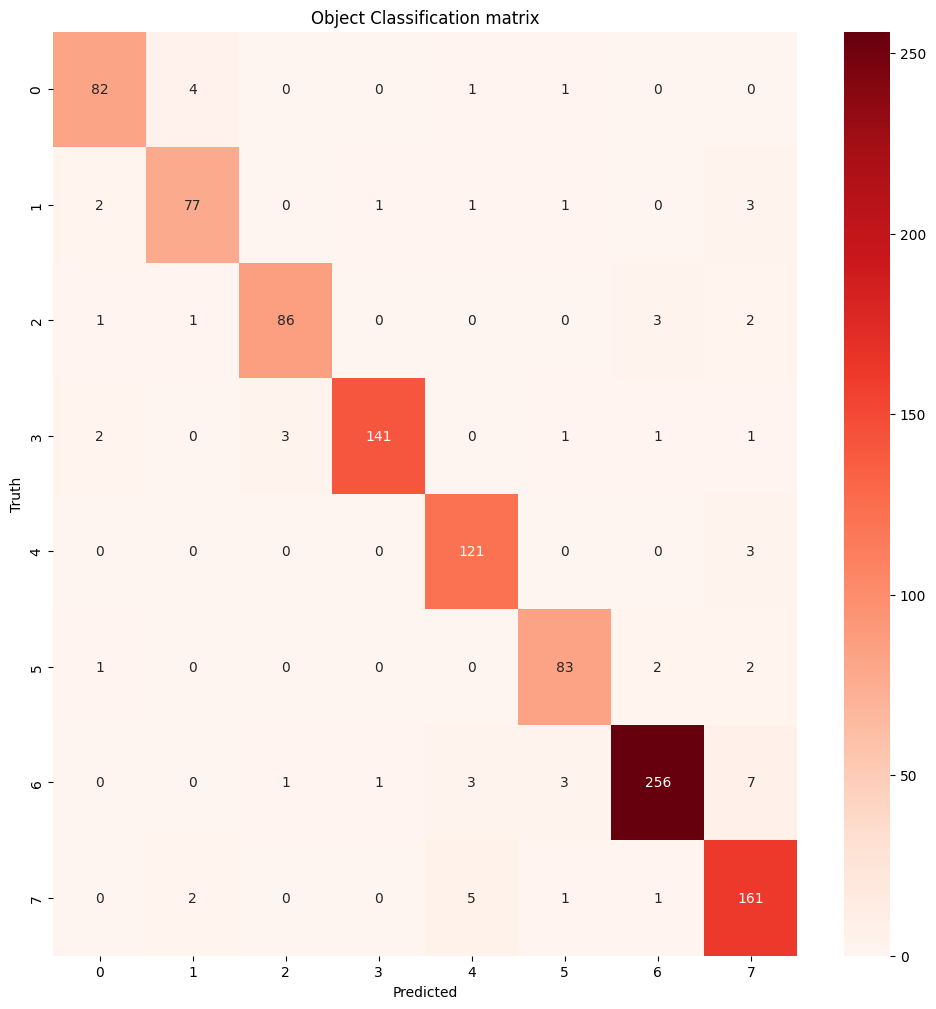

In [ ]:
from sklearn.metrics import confusion_matrix

#y_valid = le.inverse_transform(y_val)
# Generate the confusion matrix
plt.figure(figsize=(12,12))
confusion_matrix = confusion_matrix(test_dev, object_predictions)

# # Plot the confusion matrix
# sns.heatmap(confusion_matrix, annot=True, fmt ='d')
sns.heatmap(confusion_matrix, annot=True,fmt="d",cmap='Reds')
plt.title('Object Classification matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
# plt.imshow(confusion_matrix, cmap = 'binary')
# plt.show

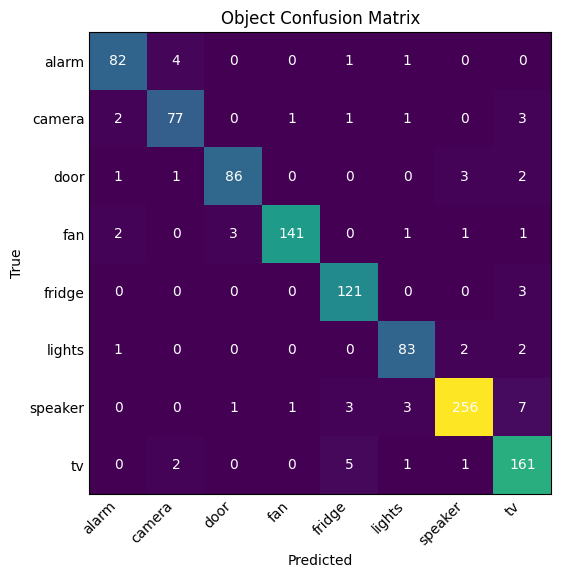

In [ ]:
plot_confusion_matrix(confusion_matrix, labels = dev_encoder.classes_)

In [ ]:
print('Object classification report')
print(classification_report(test_dev, object_predictions))

Object classification report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        88
           1       0.92      0.91      0.91        85
           2       0.96      0.92      0.94        93
           3       0.99      0.95      0.97       149
           4       0.92      0.98      0.95       124
           5       0.92      0.94      0.93        88
           6       0.97      0.94      0.96       271
           7       0.90      0.95      0.92       170

    accuracy                           0.94      1068
   macro avg       0.94      0.94      0.94      1068
weighted avg       0.94      0.94      0.94      1068



In [ ]:
model.save("/content/drive/MyDrive/models_lug/lug_slot.h5")

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

In [ ]:
tflite_model_name = "lug_slot.tflite"
open(tflite_model_name, "wb").write(tflite_model)

422204

## allow bias

In [ ]:
# from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, GlobalMaxPooling2D, Dropout, Dense
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import Adam

main_input = Input(shape=(126, 10, 1), name='main_input')

x = Conv2D(16, 3, padding='same', activation='relu')(main_input)
x = BatchNormalization()(x)

x = Conv2D(16, 2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(16, 2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(32, 3, padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, 2, padding='same', activation='relu')(x)
x = BatchNormalization()(x)

# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)

x = Dropout(0.1)(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)

intent_output = Dense(20, activation='softmax', name='intent_output')(x)

model = Model(inputs=main_input, outputs=intent_output)

optim = Adam(learning_rate=1e-3)

model.compile(optimizer=optim, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
tf.keras.utils.plot_model(model,show_shapes= True)

In [ ]:
history = model.fit(Xtrain,ytrain, validation_data = (Xval,yval), epochs = 80,workers = 6, max_queue_size = 10,use_multiprocessing = True,batch_size=32,callbacks=[early_stopping])

In [ ]:
loss, accuracy = model.evaluate(Xtest, ytest)

print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

In [ ]:
plot_accuracy(history)

In [ ]:
plot_loss(history)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(Xtest)
# y_pred.shape

y_pred = np.argmax(y_pred, axis=1)
y_true = ytest

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

In [ ]:
plot_confusion_matrix(cm)

In [ ]:
model.save("/content/drive/MyDrive/models_lug_aug_flat/lug.h5")

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = tf_lite_converter.convert()

In [ ]:
tflite_model_name = "lug_aug_flat.tflite"
open(tflite_model_name, "wb").write(tflite_model)